# Data Exploration & Preprocessing

In [1]:
%matplotlib inline

from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data

In [2]:
df = pd.read_csv("./data/HTRU2/HTRU_2.csv", names = ['Profile_mean', 'Profile_stdev', 'Profile_skewness', 
                                                      'Profile_kurtosis', 'DM_mean', 'DM_stdev', 'DM_skewness',
                                                      'DM_kurtosis', 'class'])

df

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


## Exploration

### Lost values

In [3]:
df.isnull().values.any() # Has no NaN/lost values 


False

In [4]:
df.isna().values.any()

False

### Statistic analysis

Data boxplot:

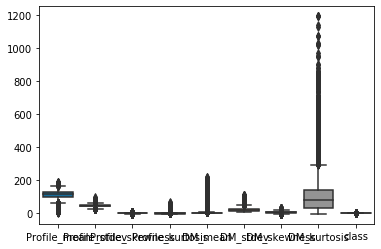

In [5]:
sns.boxplot(data = df, palette="colorblind")

Description of the features:

In [6]:
df.describe()

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis,class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [7]:
pd.set_option('display.max_columns', 500)
df.groupby('class').describe()
#df.describe()

Profile_mean                                                            \
             count        mean        std        min         25%         50%   
class                                                                          
0          16259.0  116.562726  17.475932  17.210938  105.253906  117.257812   
1           1639.0   56.690608  30.007707   5.812500   31.777344   54.296875   

                              Profile_stdev                                  \
              75%         max         count       mean       std        min   
class                                                                         
0      128.285156  192.617188       16259.0  47.339741  6.182929  28.698714   
1       79.277344  139.257812        1639.0  38.710598  8.033614  24.772042   

                                                  Profile_skewness            \
             25%        50%        75%        max            count      mean   
class                                                                          
0      43.384645  47.485647  51.315620  98.778911          16259.0  0.210440   
1      32.284803  37.341297  43.759278  83.796909           1639.0  3.130655   

                                                                   \
            std       min       25%       50%       75%       max   
class                                                               
0      0.334606 -1.876011  0.008650  0.186665  0.392892  4.785786   
1      1.872861 -0.094888  1.556038  2.961258  4.586930  8.069522   

      Profile_kurtosis                                                       \
                 count       mean        std       min       25%        50%   
class                                                                         
0              16259.0   0.380844   1.027791 -1.791886 -0.221980   0.124107   
1               1639.0  15.553576  13.997200 -1.139069  3.805492  11.609644   

                             DM_mean                                  \
             75%        max    count       mean        std       min   
class                                                                  
0       0.663383  24.872429  16259.0   8.863258  24.411409  0.213211   
1      24.881853  68.101622   1639.0  49.825995  45.287932  0.486622   

                                                   DM_stdev             \
             25%        50%        75%         max    count       mean   
class                                                                    
0       1.857023   2.635452   4.227007  223.392140  16259.0  23.287984   
1      12.759615  33.494983  78.313545  199.577759   1639.0  56.468963   

                                                                         \
             std       min        25%        50%        75%         max   
class                                                                     
0      16.651426  7.370432  14.138541  17.618420  24.517386  110.642211   
1      19.731080  7.658623  43.333643  59.367088  70.985965  109.655345   

      DM_skewness                                                              \
            count      mean       std      min       25%       50%        75%   
class                                                                           
0         16259.0  8.862674  4.238626 -3.13927  6.615374  8.760010  10.935207   
1          1639.0  2.757069  3.105945 -1.86232  0.756451  1.918327   3.709978   

                 DM_kurtosis                                               \
             max       count        mean         std       min        25%   
class                                                                       
0      34.539844     16259.0  113.620344  106.721930 -1.976976  47.580165   
1      30.883882      1639.0   17.931728   50.896263 -1.874683  -0.228294   

                                           
             50%         75%          max  
class                                      
0      90.674592  145.827223  1191

## Preprocessing

### Standarization

In [8]:
scaler = StandardScaler()

scaledData = scaler.fit_transform(df.drop(['class'], axis = 1))

stdDf = pd.DataFrame(scaledData, columns = df.columns[:-1])
stdDfWithClass = pd.concat([stdDf, df[['class']]], axis = 1)

In [9]:
stdDfWithClass.to_csv("./data/stdHTRU_2.csv", index = False)

### Feature Extraction

Correlation Matrix of Data:

In [10]:
corrStd = stdDf.corr()
corrStd.style.background_gradient(cmap='coolwarm')

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis
Profile_mean,1,0.547137,-0.873898,-0.738775,-0.298841,-0.307016,0.234331,0.144033
Profile_stdev,0.547137,1,-0.521435,-0.539793,0.00686873,-0.0476316,0.0294294,0.0276915
Profile_skewness,-0.873898,-0.521435,1,0.945729,0.414368,0.43288,-0.341209,-0.214491
Profile_kurtosis,-0.738775,-0.539793,0.945729,1,0.412056,0.41514,-0.328843,-0.204782
DM_mean,-0.298841,0.00686873,0.414368,0.412056,1,0.796555,-0.615971,-0.354269
DM_stdev,-0.307016,-0.0476316,0.43288,0.41514,0.796555,1,-0.809786,-0.5758
DM_skewness,0.234331,0.0294294,-0.341209,-0.328843,-0.615971,-0.809786,1,0.923743
DM_kurtosis,0.144033,0.0276915,-0.214491,-0.204782,-0.354269,-0.5758,0.923743,1


In order to improve the performance of ML models that will be affected by the correlation of features and irrelevant variables, we will remove the correlated features (with correlation higher than 0.9).

In [11]:
features = np.full((corrStd.shape[0],), True, dtype=bool)
for i in range(corrStd.shape[0]):
    for j in range(i+1, corrStd.shape[0]):
        if corrStd.iloc[i,j] >= 0.9:
            if features[j]:
                features[j] = False

selectedFeatures = stdDf.columns[features]

noCorrStdData = stdDf[selectedFeatures]

In [12]:
noCorrStdDfWithClassData = pd.concat([noCorrStdData, df[['class']]], axis = 1)

In [13]:
corrNoCorrStd = noCorrStdDfWithClassData.corr()
corrNoCorrStd.style.background_gradient(cmap='coolwarm')

,Profile_mean,Profile_stdev,Profile_skewness,DM_mean,DM_stdev,DM_skewness,class
Profile_mean,1,0.547137,-0.873898,-0.298841,-0.307016,0.234331,-0.673181
Profile_stdev,0.547137,1,-0.521435,0.00686873,-0.0476316,0.0294294,-0.363708
Profile_skewness,-0.873898,-0.521435,1,0.414368,0.43288,-0.341209,0.791591
DM_mean,-0.298841,0.00686873,0.414368,1,0.796555,-0.615971,0.400876
DM_stdev,-0.307016,-0.0476316,0.43288,0.796555,1,-0.809786,0.491535
DM_skewness,0.234331,0.0294294,-0.341209,-0.615971,-0.809786,1,-0.390816
class,-0.673181,-0.363708,0.791591,0.400876,0.491535,-0.390816,1


In [14]:
noCorrStdDfWithClassData.to_csv("./data/noCorrStdHTRU_2.csv", index = False)